In [ ]:
import numpy as np
import tensorflow as tf
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from keras.preprocessing.image import image, load_img
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
import pandas as pd
import io
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from os import makedirs, listdir
from random import random, randint, seed
from shutil import copyfile
from glob import glob
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import joblib
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import gdown

In [ ]:
!pip install faiss-cpu
!pip install faiss-gpu
import faiss

     |████████████████████████████████| 8.5 MB 4.0 MB/s 
     |████████████████████████████████| 90.1 MB 17 kB/s 


In [ ]:
url = 'https://drive.google.com/uc?id=1L3vdn_8HeNNAPJWayEMoMhW45H2uOUhr'
output = 'test_flowers.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1L3vdn_8HeNNAPJWayEMoMhW45H2uOUhr
To: /content/test_flowers.zip
100%|██████████| 5.09M/5.09M [00:00<00:00, 22.7MB/s]


'test_flowers.zip'

In [ ]:
!unzip test_flowers.zip # test sample of images to test the model

Archive:  test_flowers.zip
   creating: test_flowers/
  inflating: test_flowers/10090824183_d02c613f10_m.jpg  
  inflating: test_flowers/13231224664_4af5293a37.jpg  
  inflating: test_flowers/1402130395_0b89d76029.jpg  
  inflating: test_flowers/15277801151_5ed88f40f0_n.jpg  
  inflating: test_flowers/17969516345_d0081a5f18_n.jpg  
  inflating: test_flowers/17970201501_6ee7401206_n.jpg  
  inflating: test_flowers/1798082733_b8080b1173_m.jpg  
  inflating: test_flowers/17990320484_93bba345d2_m.jpg  
  inflating: test_flowers/18089878729_907ed2c7cd_m.jpg  
  inflating: test_flowers/18097401209_910a46fae1_n.jpg  
  inflating: test_flowers/181007802_7cab5ee78e_n.jpg  
  inflating: test_flowers/18111636378_856027a7b8_n.jpg  
  inflating: test_flowers/1813435848_7852708394_n.jpg  
  inflating: test_flowers/18183515403_13a9ca6d86_n.jpg  
  inflating: test_flowers/18195689904_46619b7e16_n.jpg  
  inflating: test_flowers/18203367608_07a04e98a4_n.jpg  
  inflating: test_flowers/18204150090_fb418

In [ ]:
url = 'https://drive.google.com/uc?id=10hGAwnAQ7Nf7GGvO2vpbcWJh4krdZgd-'
output = 'test_butterfly.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10hGAwnAQ7Nf7GGvO2vpbcWJh4krdZgd-
To: /content/test_butterfly.zip
100%|██████████| 48.6M/48.6M [00:01<00:00, 42.4MB/s]


'test_butterfly.zip'

In [ ]:
!unzip test_butterfly.zip # sample of butterfly images to test the model

Archive:  test_butterfly.zip
   creating: test_butterfly/
  inflating: test_butterfly/0010001.png  
  inflating: test_butterfly/0010006.png  
  inflating: test_butterfly/0010013.png  
  inflating: test_butterfly/0010014.png  
  inflating: test_butterfly/0010015.png  
  inflating: test_butterfly/0010017.png  
  inflating: test_butterfly/0010018.png  
  inflating: test_butterfly/0010019.png  
  inflating: test_butterfly/0010020.png  
  inflating: test_butterfly/0010021.png  
  inflating: test_butterfly/0010022.png  
  inflating: test_butterfly/0010023.png  
  inflating: test_butterfly/0010024.png  
  inflating: test_butterfly/0010028.png  
  inflating: test_butterfly/0010030.png  
  inflating: test_butterfly/0010036.png  
  inflating: test_butterfly/0010044.png  
  inflating: test_butterfly/0010050.png  
  inflating: test_butterfly/0010059.png  
  inflating: test_butterfly/0010084.png  
  inflating: test_butterfly/0020030.png  
  inflating: test_butterfly/0020073.png  
  inflating: test_

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2021-12-19 08:03:14--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  11.3MB/s    in 32s     

2021-12-19 08:03:47 (10.4 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]



In [ ]:
!tar -zxvf 102flowers.tgz

Выходные данные были обрезаны до нескольких последних строк (5000).
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01

### **Feature extraction**

In [ ]:
def extract_features(img_path, model):
  """
  Feature extraction function. 
  The function takes the path to the image, loads the image, resizes it to the dimensions, 
  supported by the model, extracts features and normalizes them
  """
  input_shape = (224, 224, 3)
  img1 = image.load_img(img_path, target_size=(input_shape[0], input_shape[1])).convert('RGB')
  img_array = image.img_to_array(img1)
  expanded_img_array = np.expand_dims(img_array, axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  features = model.predict(preprocessed_img)
  flattened_features = features.flatten()
  normalized_features = flattened_features / norm(flattened_features)
  return normalized_features

In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
  """
  Function to get all file names in a specified folder
  """
  file_list = []
  for root, directories, filenames in os.walk(root_dir):
    for filename in filenames:
      if any(ext in filename for ext in extensions):
        file_list.append(os.path.join(root, filename))
  return file_list

In [ ]:
filenames = sorted(get_file_list('jpg/')) # sorted file paths

n =  318


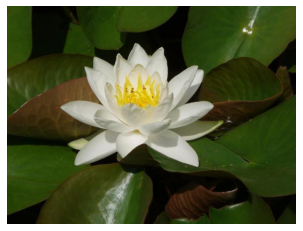

In [ ]:
# Visualize an arbitrary image
n = 318
img = mpimg.imread(filenames[n])
imgplot = plt.imshow(img)
print('n = ', n)
plt.axis("off")
plt.show()

In [ ]:
%time
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
features = extract_features(filenames[0], model)
print(len(features))

2048


In [ ]:
# Feature vector extraction
feature_list = []
for i in tqdm(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

  0%|          | 0/8189 [00:00<?, ?it/s]

In [ ]:
len(feature_list)

In [ ]:
# Saving feature vector and file names in a pickle format
makedirs('data/', exist_ok=True)
pickle.dump(feature_list, open('data/features.pickle', 'wb'))
pickle.dump(filenames, open('data/filenames.pickle','wb'))

### **Search for similarities**

In [ ]:
# Load feature vector and file names in a pickle format
%time
filenames = pickle.load(open('data/filenames.pickle', 'rb'))
feature_list = pickle.load(open('data/features.pickle', 'rb'))

In [ ]:
def knn_faiss(xb, xq):
  """
  The function takes as input a vector of features from the database and a vector of features of the query image.
  The output is the distances to the nearest neighbors and their paths.
  """
  xb = np.array(xb).astype('float32')

  xq = np.array(xq).astype('float32')
  index = faiss.index_factory(len(xb[1]), "Flat")
  index.train(xb)
  index.add(xb)
  distances, neighbors = index.search(xq.reshape(1,-1).astype(np.float32), 5)
  return distances, neighbors

In [ ]:
def search_faiss(path_im, feature_list, model):
  """
  The function takes the path to the image as input. It retrieves the attributes for the submitted query image.
  It searches for the nearest neighbors. Outputs paths for similar images.
  """
  feat = extract_features(path_im, model)
  distances, neighbors = knn_faiss(feature_list, feat)
  for i in range(4):
    similar_paths = [filenames[neighbors[0][i]] for i in range(0,4)]
  return similar_paths, distances


# **Visualization of similar images for randomly selected query images**

Query image


<Figure size 432x288 with 0 Axes>

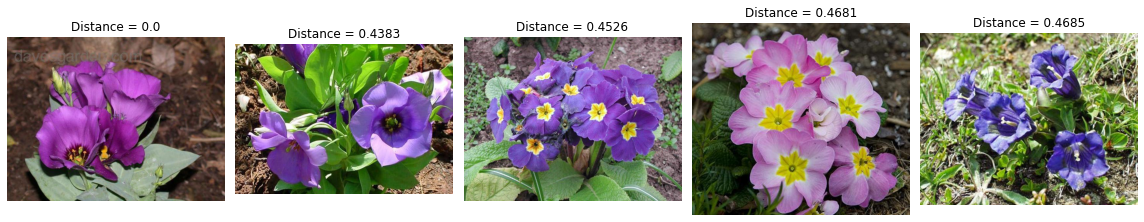

Query image


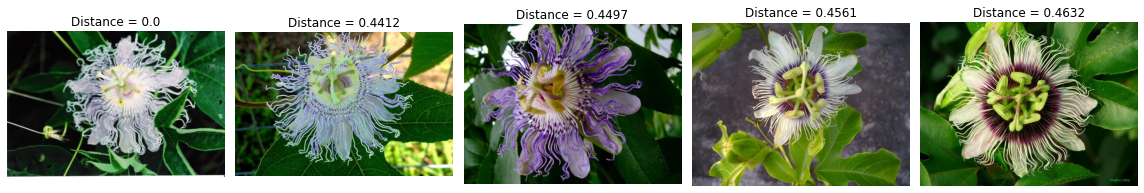

Query image


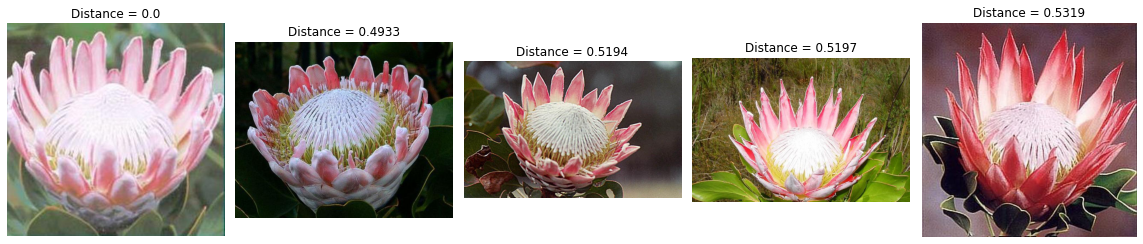

Query image


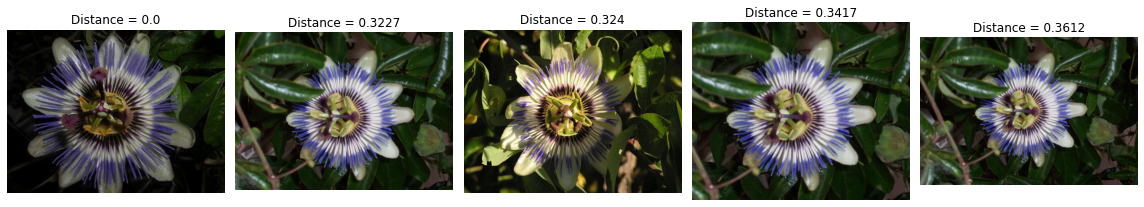

Query image


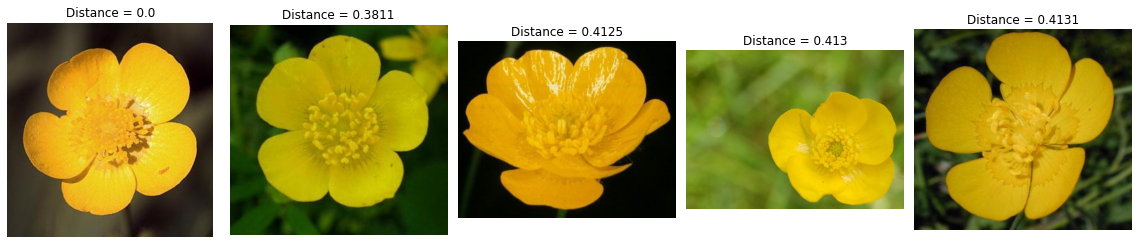

In [ ]:
def plot_flowers(filenames, feature_list, model):
  fig = plt.figure(tight_layout = True)
  fig.suptitle("Similar images")

  for i in range(5):
      print('Query image')
      random_image_index = randint(0, 8000)
      feat1 = extract_features(filenames[random_image_index], model)
      distances, neighbors = knn_faiss(feature_list, feat1)
      similar_image_paths = [filenames[neighbors[0][i]] for i in range(0,5)]

      fig = plt.figure(4, figsize = (16, 16))
      for k in range(5):
    
        plt.subplot(5, 5, k+1)
        imm = load_img(similar_image_paths[k])
        plt.imshow(imm)
        dist = round(distances[0][k], 4)
        plt.title('Distance = ' + str(dist))
        plt.axis("off")
      
        plt.tight_layout()
      plt.show()
  return

plot_flowers(filenames, feature_list, model)

In [ ]:
test_filenames = sorted(get_file_list('/content/test_flowers/')) # отсортированные пути к файлам тестовой выборки

In [ ]:
%time
def plot_test_image(test_filenames, feature_list, model):
  fig = plt.figure(tight_layout = True)

  for i in range(4):
      print('Query image')
      random_image_index = randint(0, 100)
      plt.imshow(load_img(test_filenames[random_image_index]))
      plt.axis("off")
      similar_image_paths, distances = search_faiss(test_filenames[random_image_index], feature_list, model)

      fig = plt.figure(4, figsize = (16, 16))
      fig.suptitle("Similar images \n")
      for k in range(4):
    
        plt.subplot(4, 5, k + 1)
        imm = load_img(similar_image_paths[k])
        plt.imshow(imm)
        dist = round(distances[0][k], 4)
        plt.title('Distance = ' + str(dist))
        plt.axis("off")
      
        plt.tight_layout()
      plt.show()
  return

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


# **Testing with a test sample**

Query image


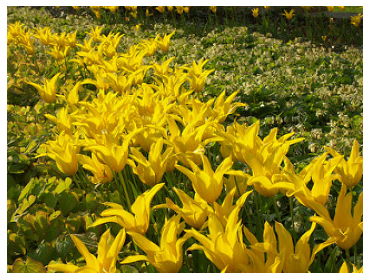

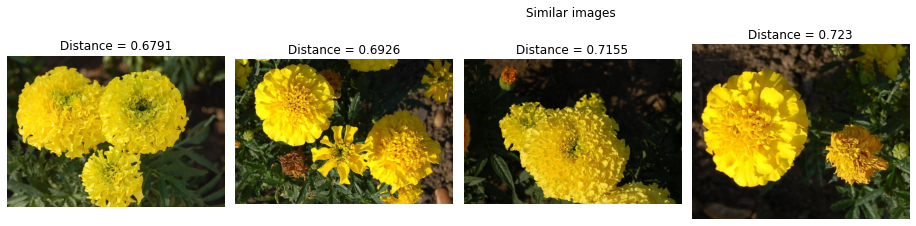

Query image


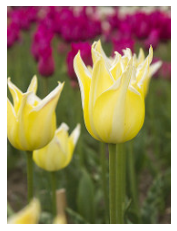

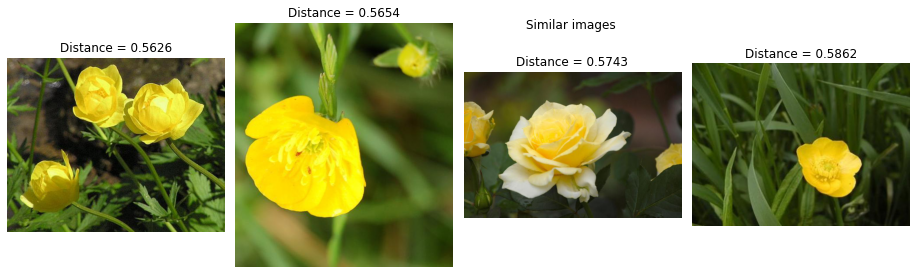

Query image


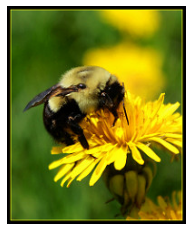

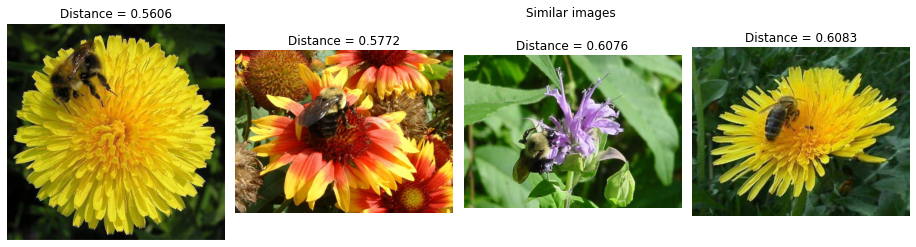

Query image


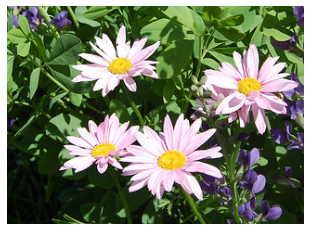

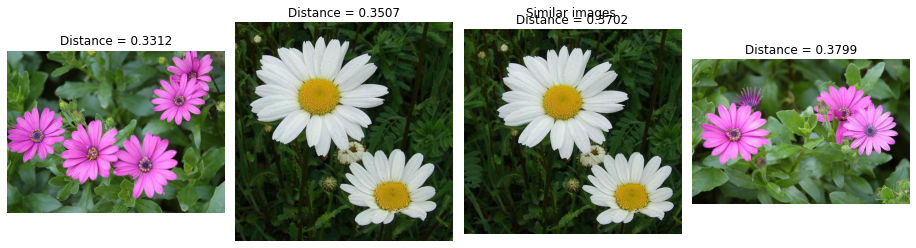

In [ ]:
plot_test_image(test_filenames, feature_list, model)

# **Testing with butterfly images**

In [ ]:
test_filenames_butterfly = sorted(get_file_list('/content/test_butterfly/')) # sorted paths to the test sample files

Query image


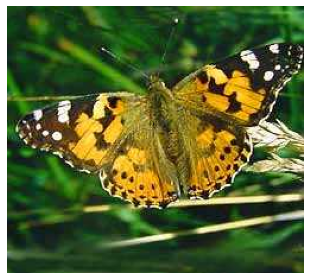

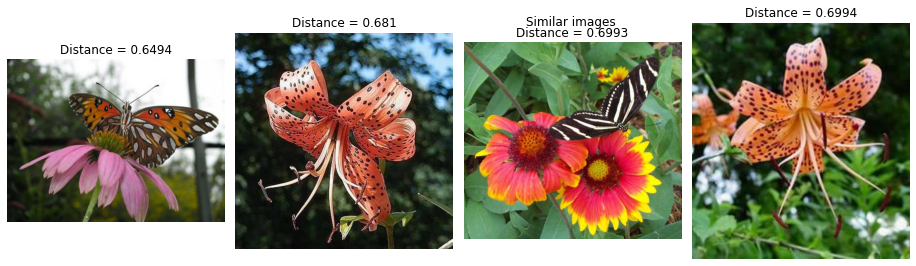

Query image


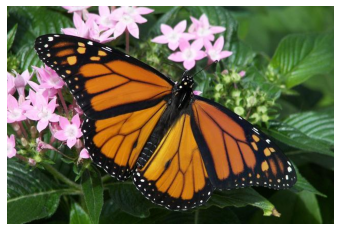

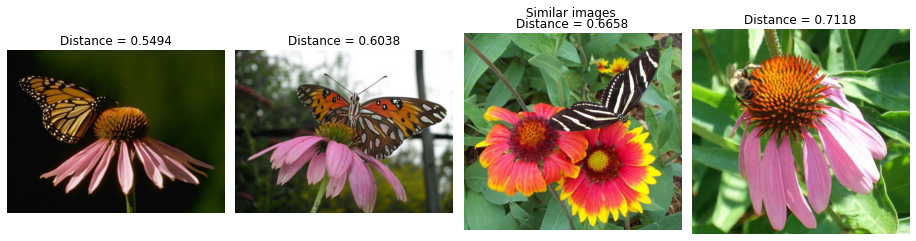

Query image


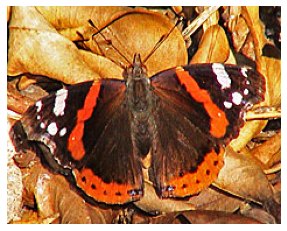

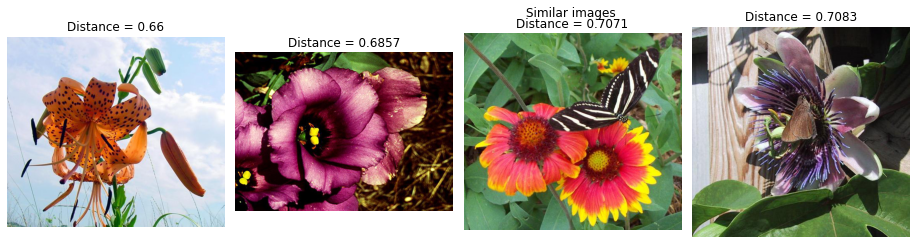

Query image


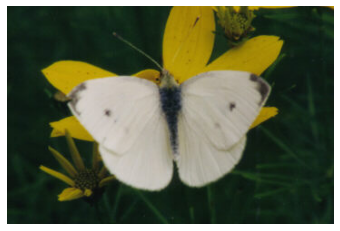

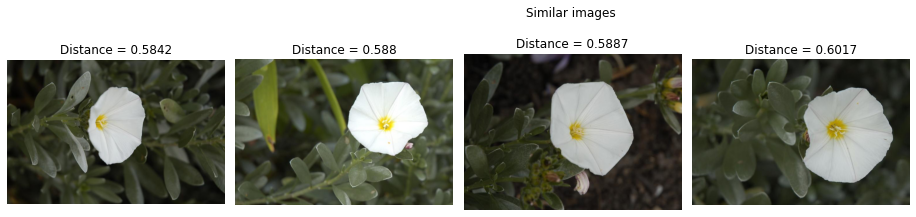

In [ ]:
plot_test_image(test_filenames_butterfly, feature_list, model)

# **Demo form**

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip -q ngrok-stable-linux-amd64.zip

In [ ]:
def get_link():
    get_ipython().system_raw('./ngrok http 8501 &')
    !curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Link to launch: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [ ]:
! ./ngrok authtoken 1QXoYIvfW1TQ9HM2TAfMfIKEDgD_36MLdm3jRtQse35URJUPt

In [ ]:
# !pip -q install streamlit
!pip install streamlit

In [ ]:
code = '''
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pickle
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import InceptionV3
import os
from os import makedirs
from PIL import Image
from glob import glob
from numpy.linalg import norm
import time
import faiss
from itertools import cycle
st.set_page_config(page_title='Search for similar images', layout="centered")

filenames = pickle.load(open('data/filenames.pickle', 'rb'))
feature_list = pickle.load(open('data/features.pickle', 'rb'))
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))

def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img1 = load_img(img_path, target_size=(
        input_shape[0], input_shape[1])).convert('RGB')
    img_array = img_to_array(img1)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

def knn_faiss(xb, xq):
  xb = np.array(xb).astype('float32')
  xq = np.array(xq).astype('float32')
  index = faiss.index_factory(len(xb[1]), "Flat")
  index.train(xb)
  index.add(xb)
  distances, neighbors = index.search(xq.reshape(1,-1).astype(np.float32), 5)
  return distances, neighbors
 
def search_faiss(path_im):
  feat = extract_features(path_im, model)
  distances, neighbors = knn_faiss(feature_list, feat)
  for i in range(4):
    similar_paths = [filenames[neighbors[0][i]] for i in range(0,4)]
  return similar_paths

makedirs('tempDir/', exist_ok=True)
def save_uploadedfile(uploadedfile):
  with open(os.path.join("tempDir", uploadedfile.name),"wb") as f:
         f.write(uploadedfile.getbuffer())
  return

st.subheader('Search for similar images')
uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file:
  save_uploadedfile(uploaded_file)
  path_in = './tempDir/'+ uploaded_file.name
  im = Image.open(uploaded_file)
  st.image(im, width = 400)
  st.write("")
  st.write("Searching...")
  sim_paths = search_faiss(path_in)
  st.subheader('Similar images') 
  cols = st.columns(4)
  for i in range(4):
    cols[i].image(sim_paths[i])
else:
  path_in = None

'''

with open('search_flowers.py', 'w') as f:
    f.write(code)

## To run the demo form, run the last cell and click on the link below:

In [ ]:
get_link()

In [ ]:
!streamlit run search_flowers.py